                                                Activity 3 - CBD-2214
                                                
                                                Stock Trading Analysis
                                                       Group B

**In this report, we will being covering:**
> Regression Model done from *Activity 2* along with the result and performace metrics

> *Activity 3* includes:
>> 1) Compare your Activity 2 result with and without first **scaling your dataset**.
>> 2) **Engineer a new feature** and compare your Activity 2 results with and without this new feature.
>> 3) Use **Dimension Reduction PCA to rank the importance of each feature** and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

> Conclusion

## Activity 2: Linear Regression

### 1. Data extraction and exploration

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load dataset into notebook
df = pd.read_csv(r"C:\Users\HP\Desktop\Big Data - CBD Subject\Trading_Stock_Ver1.0.0.csv")

In [6]:
# Have a first quick look at data and features
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  int64  
 15  stock price for iv  221046 non-nul

In [8]:
# Explore "*" column in the dataset
df["*"].value_counts()

*    29039
Name: *, dtype: int64

<div class="alert alert-block alert-info">
<b>There are few things should be done before exploring the dataset: </b> 
    
- Remove **'*'** column because it has a unique value of **'*'** -> Does not contribute any insight to the stock trading prediction
    
- Rename columns with new meaningful names for better understanding and visualization later
    
- Convert **'Date'** and **'Expiration'** columns to datetime data type (Currently categorical data type) 
</div>

In [9]:
# Remove out '*' column
df.drop(columns = '*', axis = 1, inplace = True)
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,0.000,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,218.955,-1.0,0,1,438.97,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,0.000,-1.0,50,328,438.97,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,213.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0


In [10]:
# Convert 'Date' and 'Expiration' to Datetime data type
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   symbol              221046 non-null  object        
 1   exchange            221046 non-null  object        
 2   date                221046 non-null  datetime64[ns]
 3   adjusted close      221046 non-null  float64       
 4   option symbol       221046 non-null  object        
 5   expiration          221046 non-null  datetime64[ns]
 6   strike              221046 non-null  float64       
 7   call/put            221046 non-null  object        
 8   style               221046 non-null  object        
 9   ask                 221046 non-null  float64       
 10  bid                 221046 non-null  float64       
 11  mean price          221046 non-null  float64       
 12  iv                  221046 non-null  float64       
 13  volume              221046 no

### 2. Data Aggregation and Representation

In [11]:
df.rename(columns = {
                    'adjusted close': 'underlying price',
                    'strike': 'strike price',
                    'iv': 'implied volatility',
                    'mean price': 'option price'
                    }, inplace = True)
df.head(1)

,symbol,exchange,date,underlying price,option symbol,expiration,strike price,call/put,style,ask,...,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-info">
<b>Important Notes: </b> 
    
- **Option price** is actually the mean price - the average of ask and bid prices

- **Adjusted close price** is the underlying price - the actual closing price on that day 

- **Stock price for iv** is used to calculate the implied volatility of the option contract. Implied volatility is a theoretical value that measures the expected volatility of the underlying stock over the period of the option.
</div>


In [12]:
# Explore Numerical Data Columns
df.describe()

,underlying price,strike price,ask,bid,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000
mean,435.089149,398.702076,41.667365,40.967420,41.315752,0.234593,405.715661,1660.743542,434.966436,0.102498,0.503011,0.005594,-0.042474,-0.067521
std,3.863763,93.725546,60.504762,59.876656,60.189057,0.225324,5100.355521,6040.663628,3.837734,0.614277,0.544469,0.009183,0.040318,1.726706
min,424.970000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.779877,-15.741297
25%,432.930000,349.000000,1.660000,1.500000,1.600000,0.139646,0.000000,1.000000,432.520000,-0.240680,0.061539,0.000718,-0.056856,-0.143418
50%,435.460000,411.000000,15.910000,15.440000,15.650000,0.206940,0.000000,100.000000,435.440000,0.000000,0.293737,0.002824,-0.035767,0.000000
75%,438.510000,454.000000,52.550000,51.550000,52.040000,0.306208,19.000000,918.000000,438.140000,0.731058,0.817714,0.006464,-0.014486,0.334990
max,441.020000,655.000000,416.890000,415.230000,416.060000,1.805012,446333.000000,169905.000000,441.050000,1.000000,2.674587,0.185555,0.000000,5.584008


In [13]:
df.describe(include = 'object')

,symbol,exchange,option symbol,call/put,style
count,221046,221046,221046,221046,221046
unique,1,1,13960,2,1
top,SPY,NYSEArca,SPY 210730C00215000,C,A
freq,221046,221046,21,110523,221046


<div class="alert alert-block alert-info">
<b>Notes: </b> 
    
*For numerical features, we have:*
- **'ask', 'bid', 'mean price', 'volume', 'open interest'** potentially have outliers as the diffences between median and (max and min) are significantly huge.

*For categorical features, we have:*
- **'symbol', 'exchange' and 'style'** have only one unique value over itself, which do not contribute any insights to predict the movement of stock in the future --> Remove out
</div>

In [14]:
df.tail(2)

,symbol,exchange,date,underlying price,option symbol,expiration,strike price,call/put,style,ask,...,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
221044,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00640000,2023-12-15,640.0,C,A,2.73,...,2.015,0.14831,5,1,430.26,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00640000,2023-12-15,640.0,P,A,216.50,...,214.000,0.14831,0,0,430.26,-0.931634,0.672488,0.000997,-0.010467,-15.169052


In [15]:
# Create a 'Instrinsic Value'
def calculate_intrinsic(c_p, stock, strike):
    if c_p == 'C':
        intrinsic_value = max(0, stock - strike)
    else:
        intrinsic_value = max(0, strike - stock)
    return intrinsic_value

df['intrinsic value']= df.apply(lambda row: calculate_intrinsic(row['call/put'],row['underlying price'],row['strike price']),axis=1)

In [16]:
# Create 'Time Value', 'Days till Expiration'
df['time value'] = df['option price'] - df['intrinsic value']
df['days till expiration'] = (df['expiration'] - df['date']).dt.days
df.head(2)

,symbol,exchange,date,underlying price,option symbol,expiration,strike price,call/put,style,ask,...,open interest,stock price for iv,delta,vega,gamma,theta,rho,intrinsic value,time value,days till expiration
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,0,438.97,0.0,0.0,0.0,0.0,0.0,223.51,0.445,0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,1401,438.97,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0


<div class="alert alert-block alert-warning">
<b>Note: </b> 

Remove categorical giving no insights to our predicted output: **symbol, exchange, option symbol, style**.
</div>

In [17]:
df.drop(columns = ['symbol', 'exchange', 'option symbol', 'style'], axis = 1, inplace = True)
df.head(2)

,date,underlying price,expiration,strike price,call/put,ask,bid,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,intrinsic value,time value,days till expiration
0,2021-07-30,438.51,2021-07-30,215.0,C,224.56,223.35,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0,223.51,0.445,0
1,2021-07-30,438.51,2021-07-30,215.0,P,0.01,0.00,0.000,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0


### 3. Data Validation and Cleansing

<div class="alert alert-block alert-warning">
<b> Note:</b> We drop off the option symbol column (containing the information about expiration date, strike price, and call/put indicator which are already existing in the dataset).
</div>

#### There is no missing values in this dataset 

#### Handling invalid volatility (-1) and unrealistic greek values (all zeros)

In [18]:
df[df['implied volatility'] == -1].describe()

,underlying price,strike price,ask,bid,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,intrinsic value,time value,days till expiration
count,3542.000000,3542.000000,3542.000000,3542.000000,3542.000000,3542.0,3542.000000,3542.000000,3542.000000,3542.0,3542.0,3542.0,3542.0,3542.0,3542.000000,3542.000000,3542.0
mean,435.145150,400.838509,25.850957,25.467981,25.657002,-1.0,6236.318746,3612.505364,435.082933,0.0,0.0,0.0,0.0,0.0,25.674692,-0.017691,0.0
std,4.030688,63.601015,44.101622,43.794165,43.949056,0.0,30126.509543,8234.604796,4.071924,0.0,0.0,0.0,0.0,0.0,43.978656,0.185454,0.0
min,424.970000,185.000000,0.010000,0.000000,0.000000,-1.0,0.000000,0.000000,425.020000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.580000,0.0
25%,432.930000,377.250000,0.010000,0.000000,0.000000,-1.0,0.000000,21.000000,432.520000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.015000,0.0
50%,435.520000,412.000000,0.145000,0.130000,0.140000,-1.0,0.000000,380.500000,435.440000,0.0,0.0,0.0,0.0,0.0,0.010000,0.000000,0.0
75%,438.510000,444.000000,34.255000,33.590000,33.947500,-1.0,57.000000,3021.750000,438.620000,0.0,0.0,0.0,0.0,0.0,33.962500,0.000000,0.0
max,441.020000,560.000000,246.550000,245.350000,245.950000,-1.0,446333.000000,101448.000000,441.050000,0.0,0.0,0.0,0.0,0.0,246.340000,0.620000,0.0


<div class="alert alert-block alert-danger">
<b> Importance: </b> 

- Implied volatility is a positive number that measures the percentage change in the stock's price over a given period of time, which means that a negative value of Volatility show that **there is no changes in the stock's price or it does move in the opposite way** which is impposible. 

--> **Invalid data for Implied Volatility indicating errors in our data**

- Within this case of -1 Volatility, it also shows that all Greek values are zeros which is unrealistic and suggests that **the option was not priced correctly**

--> To solve these errors, it can be done by removing all observations containing the volatility of -1.
</div>



In [19]:
# Show dataset shape before dropping those rows
df.shape

(221046, 20)

In [20]:
# Drop those observations having the volatility of -1 
df.drop(df[df['implied volatility'] == -1].index, inplace=True)
df.shape

(217504, 20)

In [21]:
df[df['implied volatility'] == -1] # Check again with there is anything -1 volatility

,date,underlying price,expiration,strike price,call/put,ask,bid,option price,implied volatility,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,intrinsic value,time value,days till expiration


#### Handling Outliers

In [22]:
num_cols = df.select_dtypes(include= np.number).columns.to_list()

<Axes: title={'center': 'intrinsic value'}, xlabel='[call/put]'>

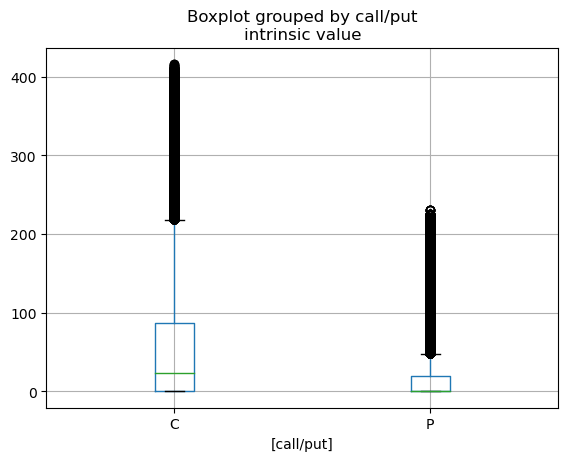

In [23]:
df.boxplot(column= ['intrinsic value'], by=['call/put'])

#### Handling data type change

In [24]:
# Convert Call option and Put Option to 1 and 0 respectively
dict = {'C': 1, 'P': 0}
df['call/put'] = df['call/put'].map(dict)

In [25]:
df = df.reset_index(drop=True)

In [26]:
# Check Duplicates 
df.duplicated().sum()

0

### Case 1: Option Price (Mean Price) as the target column

<div class="alert alert-block alert-info">
    In this case, we try to use all relevant and optimal features to predict the mean price column
</div>

### 4. Data Analytics and Visulalisation Section

C:\Users\HP\AppData\Local\Temp\ipykernel_11064\2862860306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


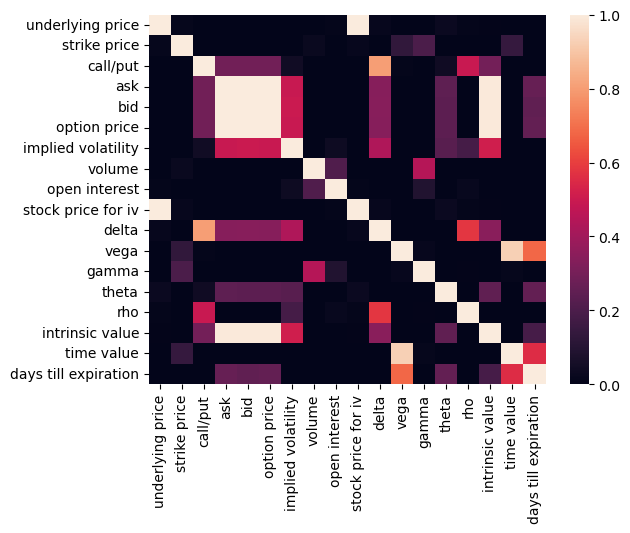

In [27]:
# Study the correlation between features and our target column - option price
corr = df.corr()

sns.heatmap(corr, vmin=0, vmax=1)
plt.show()

<div class="alert alert-block alert-success">
<b>From the heatmap:  </b> 

This suggests that 'option price' has a good correlation with columns like **'ask', 'bid', 'intrinsic value', 'days till epiration', 'iv, 'delta' and 'theta'**.
</div>

<AxesSubplot:xlabel='date', ylabel='option price'>

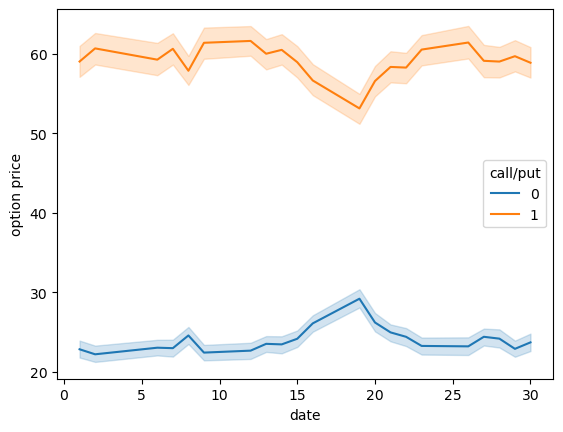

In [25]:
sns.lineplot(data = df, x = df['date'].dt.day, y = 'option price', hue = 'call/put')

<div class="alert alert-block alert-success">
<b>From the graph:   </b> 

This suggests that call options and put options have an inverse relation.
</div>

<AxesSubplot:xlabel='days till expiration', ylabel='option price'>

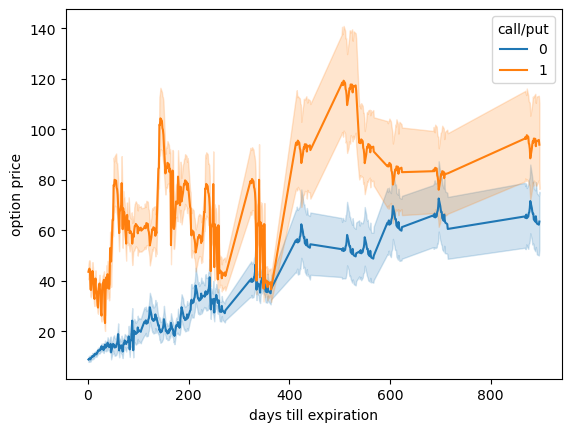

In [26]:
sns.lineplot(data = df, x = 'days till expiration', y = 'option price', hue = 'call/put')

<div class="alert alert-block alert-success">
<b>From the graph:   </b> 

The longer the time remaining on option contract, the stabler the option price gets.
</div>

<AxesSubplot:xlabel='days till expiration', ylabel='option price'>

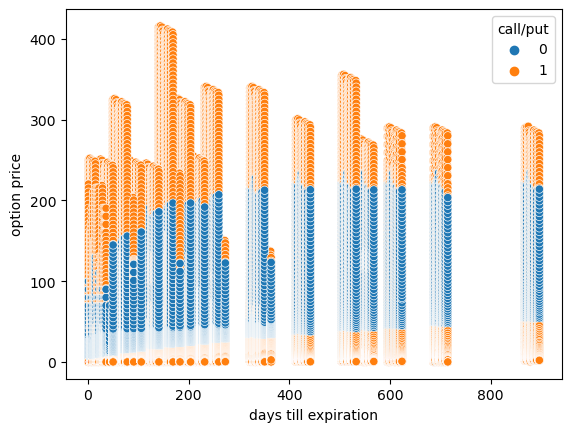

In [27]:
sns.scatterplot(data = df, x = 'days till expiration', y = 'option price', hue = 'call/put')

<AxesSubplot:xlabel='intrinsic value', ylabel='option price'>

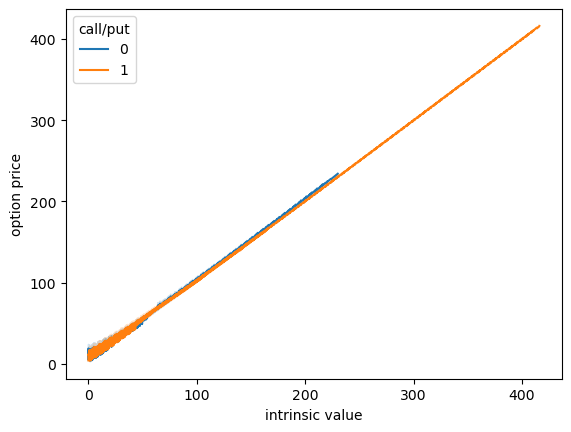

In [28]:
sns.lineplot(data = df, x = 'intrinsic value', y = 'option price', hue = 'call/put')

<div class="alert alert-block alert-success">
<b>From the graph:   </b> 

High correlation can be seen between these two features.
</div>

<AxesSubplot:xlabel='intrinsic value', ylabel='option price'>

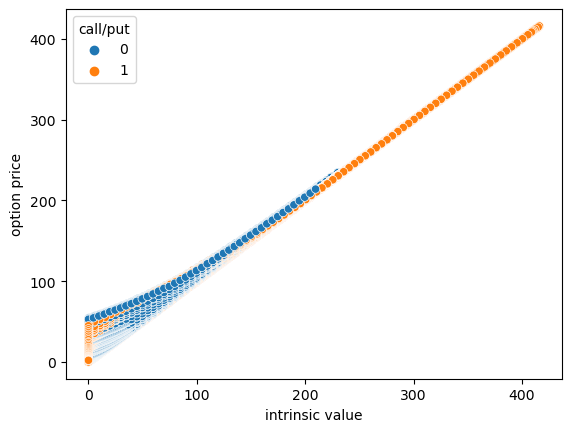

In [29]:
sns.scatterplot(data = df, x = 'intrinsic value', y = 'option price', hue = 'call/put')

<AxesSubplot:xlabel='implied volatility', ylabel='option price'>

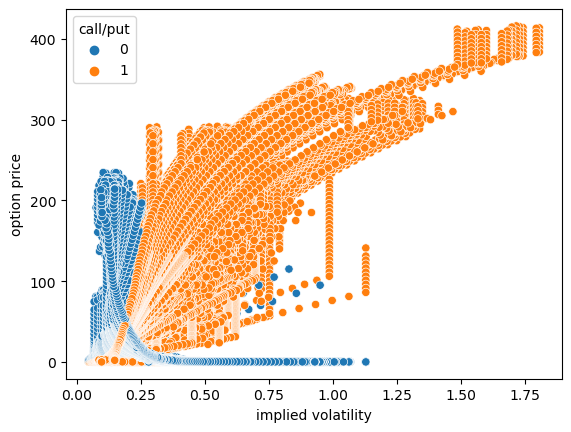

In [30]:
sns.scatterplot(data = df, x = 'implied volatility', y = 'option price', hue = 'call/put')

<div class="alert alert-block alert-success">
<b>From the graph:   </b> 

When 'iv' increases the price of put options decreases while the opposite can be seen for call options, moreover the rates of increase and decrease are not linear. 
</div>

<AxesSubplot:xlabel='delta', ylabel='option price'>

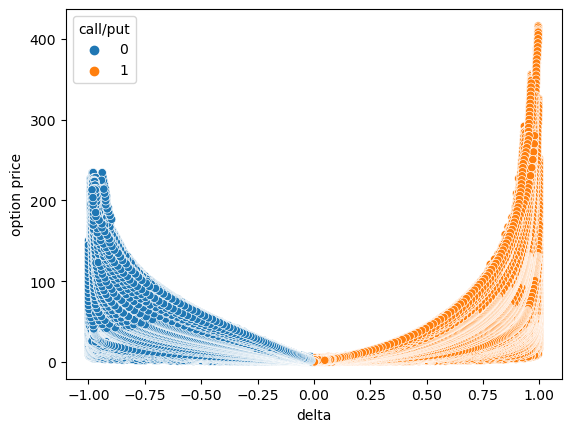

In [31]:
sns.scatterplot(data = df, x = 'delta', y = 'option price', hue = 'call/put')

<AxesSubplot:xlabel='theta', ylabel='option price'>

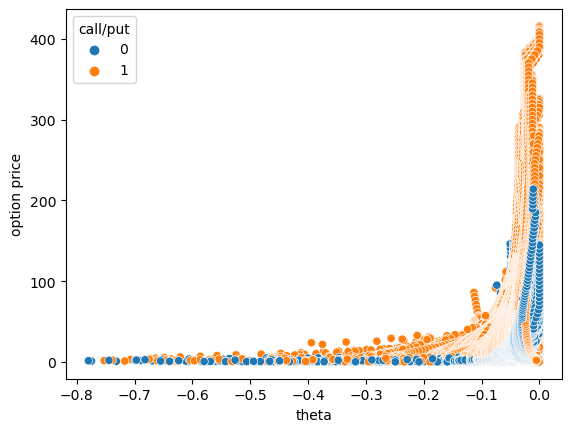

In [32]:
sns.scatterplot(data = df, x = 'theta', y = 'option price', hue = 'call/put')

### 5. Feature Selection and Building Prediction Model(Utilization of Analysis Results)

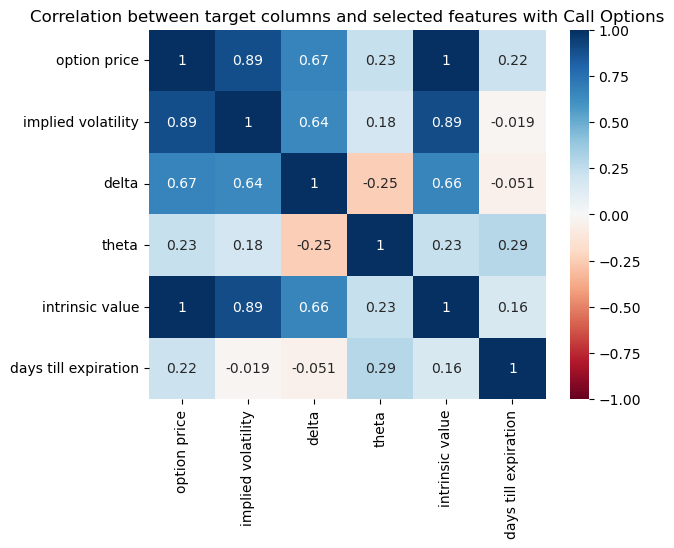

In [28]:
# Study the correlation between high-correlated features and our target column - option price
corr_1 = df[['option price', 'implied volatility', 'delta', 'theta', 'intrinsic value', 'days till expiration']][df['call/put'] == 1].corr()

sns.heatmap(corr_1, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title("Correlation between target columns and selected features with Call Options")
plt.show()

<div class="alert alert-block alert-success">
<b>From the heapmap for Call Option:   </b> 

Respecting to 'Option Price' target, we have three high-correlated features including **Intrinsic Value, Delta, and Implied Volatility for Call options**
</div>

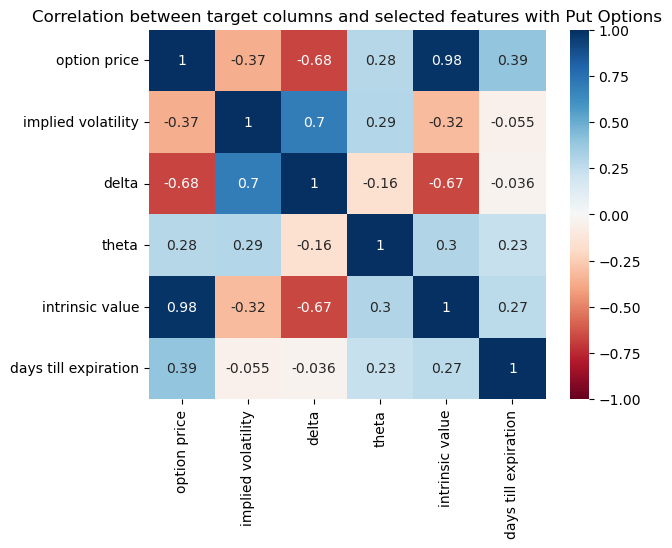

In [29]:
corr_0 = df[['option price', 'implied volatility', 'delta', 'theta', 'intrinsic value', 'days till expiration']][df['call/put'] == 0].corr()

sns.heatmap(corr_0, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title("Correlation between target columns and selected features with Put Options")
plt.show()

<div class="alert alert-block alert-success">
<b>From the heapmap for Put Option:   </b> 

Respecting to 'Option Price' target, we have two high-correlated features including **Intrinsic Value (Positive Correlation), and Delta (Negative Correlation) for Put options.**
</div>


#### Split training and test datasets for 2 types of option - Call and Put

<div class="alert alert-block alert-info">
<b>Info:</b>

In this section, we are going to split the original dataset into training and test datasets for further feeding into prediction model by:
- Using data from 'Date' column from **07/1/2021 to 07/29/2021** for training dataset and **07/30/2021** for test dataset.
- Besides, we also split the training and test datasets into sub-training and sub-test for **Call and Put options separation**.
</div>

In [30]:
# Create a dataframe including only selected features and necessary columns
features_df = df[['date', 'call/put', 'implied volatility', 'delta', 'theta', 'intrinsic value', 'days till expiration','option price']]
features_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
0,2021-07-30,1,0.361599,1.000000,-0.000546,198.51,3,198.970
1,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
2,2021-07-30,1,0.361599,1.000000,-0.000569,188.51,3,188.975
3,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
4,2021-07-30,1,0.361599,1.000000,-0.000592,178.51,3,178.975
...,...,...,...,...,...,...,...,...
217499,2021-07-01,0,0.148305,-0.924500,-0.011128,199.57,897,204.000
217500,2021-07-01,1,0.148310,0.051628,-0.005507,0.00,897,2.000
217501,2021-07-01,0,0.148310,-0.928176,-0.010792,204.57,897,209.000
217502,2021-07-01,1,0.148310,0.048170,-0.005217,0.00,897,2.015


In [31]:
# Split training and test datasets based on the datetime requirement, here we have used July 30 as our date
training_df = features_df[features_df['date'].dt.day < 30]
test_df = features_df[features_df['date'].dt.day == 30]
training_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
10418,2021-07-29,1,0.290659,0.999908,0.000000,225.65,1,225.085
10419,2021-07-29,0,0.325459,0.000000,0.000000,0.00,1,0.000
10420,2021-07-29,1,0.290659,0.999908,0.000000,220.65,1,220.085
10421,2021-07-29,0,0.325459,0.000000,0.000000,0.00,1,0.000
10422,2021-07-29,1,0.290659,0.999908,0.000000,215.65,1,215.085
...,...,...,...,...,...,...,...,...
217499,2021-07-01,0,0.148305,-0.924500,-0.011128,199.57,897,204.000
217500,2021-07-01,1,0.148310,0.051628,-0.005507,0.00,897,2.000
217501,2021-07-01,0,0.148310,-0.928176,-0.010792,204.57,897,209.000
217502,2021-07-01,1,0.148310,0.048170,-0.005217,0.00,897,2.015


In [32]:
from sklearn.linear_model import LinearRegression # model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # evaluation metrics

In [33]:
# Create X_train, X_test, y_train, y_test from the training_df dataset only
X_train, X_val, y_train, y_val = train_test_split(training_df[['implied volatility','delta','intrinsic value', 'theta', 'days till expiration']], 
                                                    training_df['option price'], 
                                                    test_size = 0.2, shuffle = True, random_state = 42)

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [34]:
cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2', cv = folds)

array([0.9915769 , 0.99154837, 0.99154753, 0.99106585, 0.99143647])

In [35]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the validation X_val
y_val_pred = lr.predict(X_val)
y_val_pred

array([ 48.68781529,  15.03435826,   4.706167  , ..., 202.67403606,
         1.97932675,  14.6699304 ])

In [37]:
# Compare the result of y_val_pred with y_val
print("Mean Absolute Error: ", mean_absolute_error(y_val, y_val_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_val, y_val_pred), end = '\n')
print("R2 Score: ", r2_score(y_val, y_val_pred))

Mean Absolute Error:  3.777385246549334
Mean Squared Error:  31.213368806677003
R2 Score:  0.9917552169237045


In [38]:
import scipy

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_val,
                                                       y= y_val_pred)

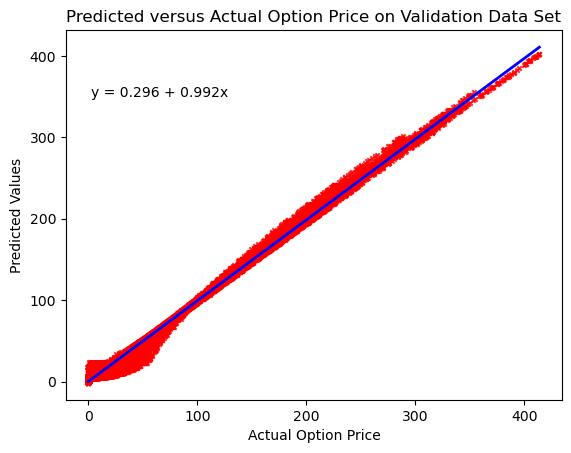

In [39]:
sns.regplot(x = y_val, y = y_val_pred, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Option Price on Validation Data Set')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Values')

#add regression equation to plot
plt.text(2, 350, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

#### Apply the learning model on test dataset

In [40]:
# Create X_test, y_test from the test_df dataset only
X_test, y_test = test_df[['implied volatility','delta','intrinsic value', 'theta', 'days till expiration']], test_df['option price']

In [41]:
# Using trained model to predict the Test Data Set
y_test_pred = lr.predict(X_test)

In [42]:
# Compare the result of y_test_pred with y_test
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred), end = '\n')
print("R2 Score: ", r2_score(y_test, y_test_pred))

Mean Absolute Error:  3.717644412288805
Mean Squared Error:  30.169567711507867
R2 Score:  0.9917042269571573


In [43]:
y_test_pred

array([193.37937132,   0.54196351, 183.67262783, ..., 227.61411723,
        22.22949811, 232.45228639])

In [44]:
test_df_result = test_df.copy()
test_df_result['option price prediction'] = y_test_pred
test_df_result

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price,option price prediction
0,2021-07-30,1,0.361599,1.000000,-0.000546,198.51,3,198.970,193.379371
1,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000,0.541964
2,2021-07-30,1,0.361599,1.000000,-0.000569,188.51,3,188.975,183.672628
3,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000,0.541964
4,2021-07-30,1,0.361599,1.000000,-0.000592,178.51,3,178.975,173.965884
...,...,...,...,...,...,...,...,...,...
10413,2021-07-30,0,0.113396,-0.966231,-0.007253,206.49,868,211.500,222.731850
10414,2021-07-30,1,0.148274,0.046914,-0.005288,0.00,868,1.800,22.244024
10415,2021-07-30,0,0.148274,-0.933077,-0.011062,211.49,868,216.000,227.614117
10416,2021-07-30,1,0.145536,0.040492,-0.004613,0.00,868,1.495,22.229498


In [46]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_test,
                                                       y= y_test_pred)

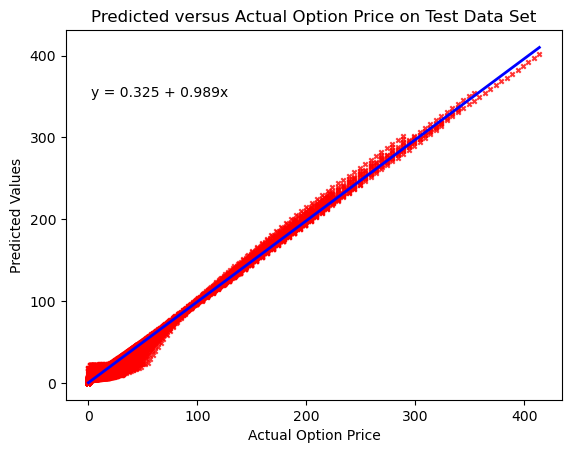

In [47]:
sns.regplot(x = y_test, y = y_test_pred, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Option Price on Test Data Set')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Values')

#add regression equation to plot
plt.text(2, 350, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
In this Machine Learning Model:
- We are trying to predict the Option Price (originally Mean Price) 
- After pre-processing and analytical steps, we did narrow down the selected features including **Implied Volatility (iv), Days Till Expiration, Intrinsic Value, Delta, Theta**.
- We also used cross-validation to train our Linear Regression Model.
- We got **99.17%** for the model accuracy on predicting the Option Price.

    
Performance Metrics on Test dataset:
- Mean Absolute Error:  3.717644412288805
- Mean Squared Error:  30.169567711507867
- R2 Score:  0.9917042269571573

**Further Strategies**
- We could actually split up the dataset into 2 sub datasets regarding the Call and Put Option and train 2 different Linear Regression models for those 2 sub datasets. Then we can take average of the results to get the final accuracy.
</div>

## Activity 3: Scaling, Engineering a new feature, and PCA

### 1. Scaling selected features

<div class="alert alert-block alert-info">
<b>Info:</b> 
 
In this section, we are going to scale our selected features from Activity 2 and compare the results before and after the scaling based on several performance metrics, namely **R2 Score, Mean Absolute Error, and Mean Squared Error**
</div>

In [48]:
from sklearn import preprocessing

In [123]:
# Create scale_training_df for scaling selected features
scale_traning_df = training_df.drop(['date', 'call/put'], axis = 1)
scale_traning_df

,implied volatility,delta,theta,intrinsic value,days till expiration,option price
10418,0.290659,0.999908,0.000000,225.65,1,225.085
10419,0.325459,0.000000,0.000000,0.00,1,0.000
10420,0.290659,0.999908,0.000000,220.65,1,220.085
10421,0.325459,0.000000,0.000000,0.00,1,0.000
10422,0.290659,0.999908,0.000000,215.65,1,215.085
...,...,...,...,...,...,...
217499,0.148305,-0.924500,-0.011128,199.57,897,204.000
217500,0.148310,0.051628,-0.005507,0.00,897,2.000
217501,0.148310,-0.928176,-0.010792,204.57,897,209.000
217502,0.148310,0.048170,-0.005217,0.00,897,2.015


#### Scaling training_df dataset

In [124]:
# We use Standard Scaler in this case to scale our features
scaler = preprocessing.StandardScaler().fit(scale_traning_df.drop(['option price'], axis = 1))
scaler

StandardScaler()

In [125]:
# Scale the training dataset
X_scaled = scaler.transform(scale_traning_df.drop(['option price'], axis = 1))
X_scaled

array([[ 0.22188448,  1.44661148,  1.0652436 ,  3.08181992, -0.84051284],
       [ 0.43654672, -0.16855212,  1.0652436 , -0.59409928, -0.84051284],
       [ 0.22188448,  1.44661148,  1.0652436 ,  3.00036813, -0.84051284],
       ...,
       [-0.6561889 , -1.66784613,  0.79851176,  2.73841918,  3.698321  ],
       [-0.6561889 , -0.09074253,  0.93630179, -0.59409928,  3.698321  ],
       [-0.6561889 , -1.67343188,  0.80654436,  2.81987097,  3.698321  ]])

In [126]:
# Store the scaled training_df in a new dataframe
scaled_train_df = pd.DataFrame(X_scaled).rename(columns={0: 'implied volatility', 1:'delta', 2:'theta', 3:'intrinsic value', 4: 'Days till Expiration'})
scaled_train_df.head()

,implied volatility,delta,theta,intrinsic value,Days till Expiration
0,0.221884,1.446611,1.065244,3.081820,-0.840513
1,0.436547,-0.168552,1.065244,-0.594099,-0.840513
2,0.221884,1.446611,1.065244,3.000368,-0.840513
3,0.436547,-0.168552,1.065244,-0.594099,-0.840513
4,0.221884,1.446611,1.065244,2.918916,-0.840513


In [128]:
# Create y target column for new scaled dataset
y = scale_traning_df['option price']
y

10418     225.085
10419       0.000
10420     220.085
10421       0.000
10422     215.085
           ...   
217499    204.000
217500      2.000
217501    209.000
217502      2.015
217503    214.000
Name: option price, Length: 207086, dtype: float64

In [129]:
# Create X_train, X_test, y_train, y_test from the scale_training_df dataset only
X_train1, X_val1, y_train1, y_val1 = train_test_split(scaled_train_df, y, test_size = 0.2, shuffle = True, random_state = 42)


In [130]:
lr.fit(X_train1, y_train1)

LinearRegression()

In [131]:
# Predict the validation X_val
y_pred1 = lr.predict(X_val1)
y_pred1

array([ 48.68781529,  15.03435826,   4.706167  , ..., 202.67403606,
         1.97932675,  14.6699304 ])

In [132]:
# Compare the result of ypred with y
print("Mean Absolute Error: ", mean_absolute_error(y_val1, y_pred1), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_val1, y_pred1), end = '\n')
print("R2 Score: ", r2_score(y_val1, y_pred1))

Mean Absolute Error:  3.7773852465493407
Mean Squared Error:  31.213368806676996
R2 Score:  0.9917552169237045


#### Scaling test_df dataset

In [133]:
# Double check test dataset
test_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
0,2021-07-30,1,0.361599,1.000000,-0.000546,198.51,3,198.970
1,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
2,2021-07-30,1,0.361599,1.000000,-0.000569,188.51,3,188.975
3,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
4,2021-07-30,1,0.361599,1.000000,-0.000592,178.51,3,178.975
...,...,...,...,...,...,...,...,...
10413,2021-07-30,0,0.113396,-0.966231,-0.007253,206.49,868,211.500
10414,2021-07-30,1,0.148274,0.046914,-0.005288,0.00,868,1.800
10415,2021-07-30,0,0.148274,-0.933077,-0.011062,211.49,868,216.000
10416,2021-07-30,1,0.145536,0.040492,-0.004613,0.00,868,1.495


In [134]:
# Create scale_test_df for scaling selected features
scale_test_df = test_df.drop(['date', 'call/put'], axis = 1)
scale_test_df

,implied volatility,delta,theta,intrinsic value,days till expiration,option price
0,0.361599,1.000000,-0.000546,198.51,3,198.970
1,0.361599,0.000000,0.000000,0.00,3,0.000
2,0.361599,1.000000,-0.000569,188.51,3,188.975
3,0.361599,0.000000,0.000000,0.00,3,0.000
4,0.361599,1.000000,-0.000592,178.51,3,178.975
...,...,...,...,...,...,...
10413,0.113396,-0.966231,-0.007253,206.49,868,211.500
10414,0.148274,0.046914,-0.005288,0.00,868,1.800
10415,0.148274,-0.933077,-0.011062,211.49,868,216.000
10416,0.145536,0.040492,-0.004613,0.00,868,1.495


In [135]:
# Use Standard Scaler for the test dataset
scaler_test = preprocessing.StandardScaler().fit(scale_test_df.drop(['option price'], axis = 1))

In [136]:
# Our scaled test dataset
X_test_scaled = scaler_test.transform(scale_test_df.drop(['option price'], axis = 1))

In [137]:
# Store the scaled test dataset in a dataframe
new_scale_test_df = pd.DataFrame(X_test_scaled).rename(columns={0: 'implied volatility', 1:'delta', 2:'theta', 3:'intrinsic value', 4: 'Days till Expiration'})
new_scale_test_df

,implied volatility,delta,theta,intrinsic value,Days till Expiration
0,0.635734,1.450808,1.206952,2.654929,-0.814028
1,0.635734,-0.162290,1.221951,-0.591827,-0.814028
2,0.635734,1.450808,1.206320,2.491372,-0.814028
3,0.635734,-0.162290,1.221951,-0.591827,-0.814028
4,0.635734,1.450808,1.205689,2.327816,-0.814028
...,...,...,...,...,...
10413,-0.843079,-1.720915,1.022710,2.785447,3.670421
10414,-0.635273,-0.086613,1.076688,-0.591827,3.670421
10415,-0.635273,-1.667434,0.918076,2.867225,3.670421
10416,-0.651587,-0.096972,1.095231,-0.591827,3.670421


In [139]:
# Separate target column Option Price after scaling 
y_test = scale_test_df['option price']
y_test

0        198.970
1          0.000
2        188.975
3          0.000
4        178.975
          ...   
10413    211.500
10414      1.800
10415    216.000
10416      1.495
10417    221.000
Name: option price, Length: 10418, dtype: float64

In [140]:
X_test = new_scale_test_df

In [141]:
# Apply model to predict y_pred
y_pred = lr.predict(X_test)
y_pred

array([194.17815769,   0.56688821, 184.4325998 , ..., 228.97144711,
        22.7411952 , 233.82632549])

In [142]:
# Compare the result of ypred with y
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred), end = '\n')
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  3.7592162625975543
Mean Squared Error:  30.11099437810047
R2 Score:  0.9917203329579113


In [143]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_test,
                                                       y= y_pred)

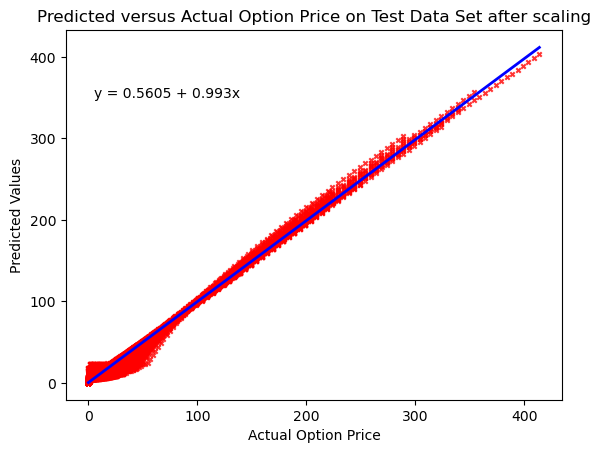

In [145]:
sns.regplot(x = y_test, y = y_pred, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Option Price on Test Data Set after scaling')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Values')

#add regression equation to plot
plt.text(5, 350, 'y = ' + str(round(intercept,4)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

<div class="alert alert-block alert-success">
<b>After scaling our features:</b> 
    
Performance Metrics on Test dataset from Activity 2:
- Mean Absolute Error:  3.717644412288805
- Mean Squared Error:  30.169567711507867
- R2 Score:  0.9917042269571573

Performance Metrics on Test dataset after Scaling features:
- Mean Absolute Error:  3.7592162625975543
- Mean Squared Error:  30.11099437810047
- R2 Score:  0.9917203329579113

Observations:
- The overall accuracy remains unchanged at 99.17%
- Scaling the features did not improve the mean squared error (MSE) or the mean absolute error (MAE) much. It might be because features are already on quite similar scale except for Intrinsic Value.
    
**Conclusion:** We cannot obviously see the importance of scaling in our prediction model as the performance of the model at first was already at 99% accuracy, but we can further try out other methods of scaling such as standardization or normalization. However, scaling is absolutely necessary in our data processing to enhance the performance of predicting values.
</div>

### 2. Engineering a New Feature

<div class="alert alert-block alert-info">
<b>Info:</b> 
 
- In this section, it is required to perform engineering a new feature based on existing features from the original dataset, then add that new feature in selected features set and compare the the results before and after the scaling based on several performance metrics, namely **R2 Score, Mean Absolute Error, and Mean Squared Error**.
 
    
    
- However, in the Activity 2, we already had engineered new features and used them as part of our selected features set, including **Instrinsic Value and Days till Expiration**. Therefore, we now are to remove those new features and run the learning model again with the originally features set and compare the results.

</div>

#### Training Dataset

In [74]:
training_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
10418,2021-07-29,1,0.290659,0.999908,0.000000,225.65,1,225.085
10419,2021-07-29,0,0.325459,0.000000,0.000000,0.00,1,0.000
10420,2021-07-29,1,0.290659,0.999908,0.000000,220.65,1,220.085
10421,2021-07-29,0,0.325459,0.000000,0.000000,0.00,1,0.000
10422,2021-07-29,1,0.290659,0.999908,0.000000,215.65,1,215.085
...,...,...,...,...,...,...,...,...
217499,2021-07-01,0,0.148305,-0.924500,-0.011128,199.57,897,204.000
217500,2021-07-01,1,0.148310,0.051628,-0.005507,0.00,897,2.000
217501,2021-07-01,0,0.148310,-0.928176,-0.010792,204.57,897,209.000
217502,2021-07-01,1,0.148310,0.048170,-0.005217,0.00,897,2.015


In [76]:
# Create a new training set without new features
training_df_new = training_df.drop(['intrinsic value','days till expiration'], axis = 1)
training_df_new

,date,call/put,implied volatility,delta,theta,option price
10418,2021-07-29,1,0.290659,0.999908,0.000000,225.085
10419,2021-07-29,0,0.325459,0.000000,0.000000,0.000
10420,2021-07-29,1,0.290659,0.999908,0.000000,220.085
10421,2021-07-29,0,0.325459,0.000000,0.000000,0.000
10422,2021-07-29,1,0.290659,0.999908,0.000000,215.085
...,...,...,...,...,...,...
217499,2021-07-01,0,0.148305,-0.924500,-0.011128,204.000
217500,2021-07-01,1,0.148310,0.051628,-0.005507,2.000
217501,2021-07-01,0,0.148310,-0.928176,-0.010792,209.000
217502,2021-07-01,1,0.148310,0.048170,-0.005217,2.015


In [77]:
y_train_new = training_df_new['option price']
X_train_new = training_df_new.drop(['option price','date', 'call/put'], axis = 1)

In [78]:
X_train_new

,implied volatility,delta,theta
10418,0.290659,0.999908,0.000000
10419,0.325459,0.000000,0.000000
10420,0.290659,0.999908,0.000000
10421,0.325459,0.000000,0.000000
10422,0.290659,0.999908,0.000000
...,...,...,...
217499,0.148305,-0.924500,-0.011128
217500,0.148310,0.051628,-0.005507
217501,0.148310,-0.928176,-0.010792
217502,0.148310,0.048170,-0.005217


In [79]:
# Create X_train, X_test, y_train, y_test from the training_df_new dataset only
X_train, X_val, y_train, y_val = train_test_split(X_train_new, y_train_new, test_size = 0.2, shuffle = True, random_state = 42)

In [80]:
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred_new = lr.predict(X_val)

In [82]:
# Compare the result of ypred with y
print("Mean Absolute Error: ", mean_absolute_error(y_val, y_pred_new), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_val, y_pred_new), end = '\n')
print("R2 Score: ", r2_score(y_val, y_pred_new))

Mean Absolute Error:  36.820164111438224
Mean Squared Error:  2646.811064291929
R2 Score:  0.3008642160932762


#### Applying the model on test dataset

In [83]:
test_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
0,2021-07-30,1,0.361599,1.000000,-0.000546,198.51,3,198.970
1,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
2,2021-07-30,1,0.361599,1.000000,-0.000569,188.51,3,188.975
3,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
4,2021-07-30,1,0.361599,1.000000,-0.000592,178.51,3,178.975
...,...,...,...,...,...,...,...,...
10413,2021-07-30,0,0.113396,-0.966231,-0.007253,206.49,868,211.500
10414,2021-07-30,1,0.148274,0.046914,-0.005288,0.00,868,1.800
10415,2021-07-30,0,0.148274,-0.933077,-0.011062,211.49,868,216.000
10416,2021-07-30,1,0.145536,0.040492,-0.004613,0.00,868,1.495


In [84]:
test_df_new = training_df.drop(['intrinsic value','days till expiration'], axis = 1)

In [85]:
y_test_new = training_df_new['option price']
X_test_new = training_df_new.drop(['option price','date', 'call/put'], axis = 1)

In [86]:
y_pred_new = lr.predict(X_test_new)

In [87]:
print("Mean Absolute Error: ", mean_absolute_error(y_test_new, y_pred_new), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test_new, y_pred_new), end = '\n')
print("R2 Score: ", r2_score(y_test_new, y_pred_new))

Mean Absolute Error:  36.541348697108795
Mean Squared Error:  2589.8720691132376
R2 Score:  0.2897979433850346


<div class="alert alert-block alert-success">
<b>Having new features:</b> 
    
Performance Metrics on Test dataset from Activity 2:
- Mean Absolute Error:  3.717644412288805
- Mean Squared Error:  30.169567711507867
- R2 Score:  0.9917042269571573

Performance Metrics on Test dataset after removing new features:
- Mean Absolute Error:  36.541348697108795
- Mean Squared Error:  2589.8720691132376
- R2 Score:  0.2897979433850346

Observations:
- The overall accuracy dramatically drops by over 60% which means the learning model performs badly on these feature alone.
- Both of the other metrics (MAE and MSE) significantly increase, indicating that the predicted values from our model are much far away from the true values.
- In this case of removing these new features, **Delta, Theta, and Implied Volatility** do not contribute much to predict Option Price.
    
**Conclusion:** We can obviously see the importance of engineering and adding new features to the learning model to help it perform better. Therefore, feature engineering is absolutely important to improve the performance of predicting values in this case.
</div>

### 3. Dimension Reduction PCA to rank the importance of each feature

<div class="alert alert-block alert-info">
<b>Information:</b> 
 
> In this section, it's required to use PCA to rank the importance of each feature and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

> We are going to do:
    
>- Conducting PCA and observe which principle components would explain the most, then map it back to our features set to see which features are the most important in each principle component. 
    
>- Using training and test datasets after using pca to fit in our Linear Regression model and compare the results


</div>

In [90]:
# Have a look again at our feature dataset
features_df

,date,call/put,implied volatility,delta,theta,intrinsic value,days till expiration,option price
0,2021-07-30,1,0.361599,1.000000,-0.000546,198.51,3,198.970
1,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
2,2021-07-30,1,0.361599,1.000000,-0.000569,188.51,3,188.975
3,2021-07-30,0,0.361599,0.000000,0.000000,0.00,3,0.000
4,2021-07-30,1,0.361599,1.000000,-0.000592,178.51,3,178.975
...,...,...,...,...,...,...,...,...
217499,2021-07-01,0,0.148305,-0.924500,-0.011128,199.57,897,204.000
217500,2021-07-01,1,0.148310,0.051628,-0.005507,0.00,897,2.000
217501,2021-07-01,0,0.148310,-0.928176,-0.010792,204.57,897,209.000
217502,2021-07-01,1,0.148310,0.048170,-0.005217,0.00,897,2.015


In [92]:
from sklearn.decomposition import PCA

# Number of Components
pca = PCA(n_components=4)

model = pca.fit(features_df.drop(columns = ['date', 'call/put', 'option price']))
X_pc = model.transform(features_df.drop(columns = ['date', 'call/put', 'option price']))

n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['implied volatility','delta','theta','intrinsic value','days till expiration']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [93]:
df.rename(columns = {0: 'Component', 1: 'Most important feature'}, inplace = True)
df['Variance Ratio'] = pd.Series((pca.explained_variance_ratio_)*100)
df

,Component,Most important feature,Variance Ratio
0,PC0,days till expiration,91.497952
1,PC1,intrinsic value,8.501216
2,PC2,delta,0.000789
3,PC3,implied volatility,0.000040


<div class="alert alert-block alert-info">
<b>Notes:</b> 
 
- According to the Variance Ratio for each principal component above, **PC0 explains 91.497%** and **PC1 does 8.5%**. Together, if we only keep PC0 and PC1, they can explain nearly 99.99%

    
- From this result, we also see **Days till Expiration and Intrinsic Value** are the most important features for PC0 and PC1 respectively.
</div>

In [96]:
pca_features = pd.DataFrame(abs( pca.components_ ), index = ['PC0', 'PC1', 'PC2', 'PC3']
                           , columns = ('implied volatility','delta','theta','intrinsic value','days till expiration'))
pca_features

,implied volatility,delta,theta,intrinsic value,days till expiration
PC0,0.000020,0.000060,0.000053,0.063042,0.998011
PC1,0.001432,0.003665,0.000133,0.998003,0.063042
PC2,0.076310,0.997012,0.011364,0.003750,0.000299
PC3,0.994527,0.075298,0.072421,0.001154,0.000085


<div class="alert alert-block alert-info">
<b>Notes:</b> 
 
- According to the above table between our principal components and features, we obviously see the feature **days till expiration** is the most important for the first principal component (0.998011). 
- Similarly, by looking at the PC1 (Second Principal Component), **intrinsic value** is the most important (0.998003)
</div>

In [100]:
y = features_df['option price']

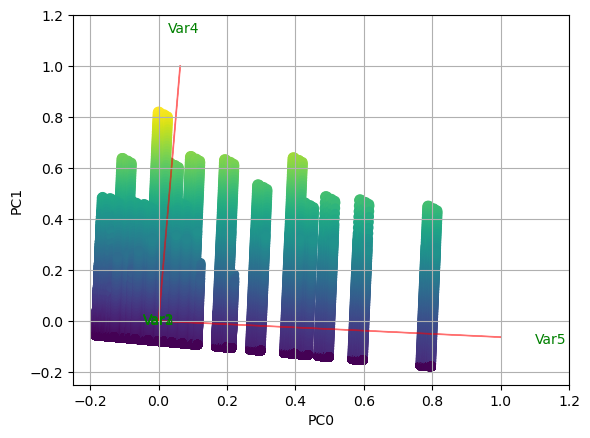

In [104]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-0.25,1.2)
plt.ylim(-0.25,1.2)
plt.xlabel("PC{}".format(0))
plt.ylabel("PC{}".format(1))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pc[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

<div class="alert alert-block alert-info">
<b>Notes:</b>  
    
- Again, this biplot is visualizing well the importance of each feature for the first and second Principal Components. The magnitudes of variable 4 and 5 are much higher than others for PC1 and PC0
    
**Conclusion:**
    
- We are going to use only PC0 and PC1 to further feed into our Regression Model
</div>

In [109]:
# Create new feature df based on PCA result
pca_df = pd.DataFrame(X_pc, columns = ('PC0', 'PC1', 'PC2', 'PC3'))
pca_df[['date', 'option price']] = features_df[['date', 'option price']]
pca_df

,PC0,PC1,PC2,PC3,date,option price
0,-153.051113,172.047238,-0.244133,-0.158956,2021-07-30,198.970
1,-165.565592,-26.070029,0.008445,0.145544,2021-07-30,0.000
2,-153.681537,162.067207,-0.281635,-0.147414,2021-07-30,188.975
3,-165.565592,-26.070029,0.008445,0.145544,2021-07-30,0.000
4,-154.311961,152.087175,-0.319137,-0.135872,2021-07-30,178.975
...,...,...,...,...,...,...
217499,739.237530,116.738544,1.427137,-0.152601,2021-07-01,204.000
217500,726.656107,-82.429363,-0.294426,0.004697,2021-07-01,2.000
217501,739.552742,121.728547,1.449556,-0.158067,2021-07-01,209.000
217502,726.656108,-82.429376,-0.290975,0.004978,2021-07-01,2.015


In [110]:
# Split training and test datasets based on the datetime requirement, here we have used July 30 as our date
pca_training_df = pca_df[pca_df['date'].dt.day < 30]
pca_test_df = pca_df[pca_df['date'].dt.day == 30]
pca_training_df

,PC0,PC1,PC2,PC3,date,option price
10418,-153.336164,199.259024,-0.136244,-0.260961,2021-07-29,225.085
10419,-167.561613,-25.943997,0.011801,0.109432,2021-07-29,0.000
10420,-153.651376,194.269009,-0.154995,-0.255189,2021-07-29,220.085
10421,-167.561613,-25.943997,0.011801,0.109432,2021-07-29,0.000
10422,-153.966588,189.278993,-0.173746,-0.249417,2021-07-29,215.085
...,...,...,...,...,...,...
217499,739.237530,116.738544,1.427137,-0.152601,2021-07-01,204.000
217500,726.656107,-82.429363,-0.294426,0.004697,2021-07-01,2.000
217501,739.552742,121.728547,1.449556,-0.158067,2021-07-01,209.000
217502,726.656108,-82.429376,-0.290975,0.004978,2021-07-01,2.015


In [111]:
# Create X_train, X_test, y_train, y_test from the training_df dataset only (Only PC0 and PC1)
X_train1, X_val1, y_train1, y_val1 = train_test_split(pca_training_df[['PC0','PC1']], 
                                                    pca_training_df['option price'], 
                                                    test_size = 0.2, shuffle = True, random_state = 42)


In [112]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train1, y_train1)

LinearRegression()

In [113]:
# Predict the validation X_val
y_val1_pred = lr.predict(X_val1)
y_val1_pred

array([ 47.99506204,  15.33185915,   3.41401376, ..., 202.04726955,
         2.88469977,  15.4311387 ])

In [114]:
# Compare the result of y_val_pred with y_val
print("Mean Absolute Error: ", mean_absolute_error(y_val1, y_val1_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_val1, y_val1_pred), end = '\n')
print("R2 Score: ", r2_score(y_val1, y_val1_pred))

Mean Absolute Error:  3.9638864016606643
Mean Squared Error:  33.0551869710873
R2 Score:  0.9912687141265987


#### Applying model on pca test dataset

In [115]:
# Create X_test, y_test from the test_df dataset only
X_test1, y_test1 = pca_test_df[['PC0','PC1']], pca_test_df['option price']

In [116]:
# Using trained model to predict the Test Data Set
y_test1_pred = lr.predict(X_test1)

In [117]:
# Compare the result of y_test_pred with y_test
print("Mean Absolute Error: ", mean_absolute_error(y_test1, y_test1_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test1, y_test1_pred), end = '\n')
print("R2 Score: ", r2_score(y_test1, y_test1_pred))

Mean Absolute Error:  3.963031992986554
Mean Squared Error:  32.65608560668292
R2 Score:  0.9910205052571122


In [118]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_test1,
                                                       y= y_test1_pred)

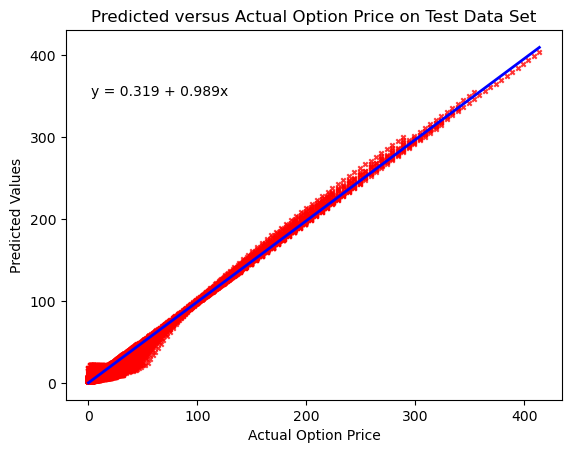

In [119]:
sns.regplot(x = y_test1, y = y_test1_pred, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Option Price on Test Data Set')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Values')

#add regression equation to plot
plt.text(2, 350, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

<div class="alert alert-block alert-success">
<b>After using PCA:</b> 
    
Performance Metrics on Test dataset from Activity 2:
- Mean Absolute Error:  3.717644412288805
- Mean Squared Error:  30.169567711507867
- R2 Score:  0.9917042269571573

Performance Metrics on Test dataset after using PCA:
- Mean Absolute Error:  3.963031992986554
- Mean Squared Error:  32.65608560668292
- R2 Score:  0.9910205052571122

Observations:
- The overall accuracy in this case slightly drop by 0.07%
- Both of the other metrics (MAE and MSE) also slighty increase which means the predicted values are actually slightly getting away from the true values
- In this case of pca, our features set includes only 5 features which are already shortlisted from Feature Selection Round. Thus, pca's result is not obviously seen. It might work better if we can use pca on the original dataset (23 features).
    
**Conclusion:** We can also see the importance of PCA Dimension Reduction to understand the key variables in the data. Therefore, it's nice to have PCA in the process of data exploration to find the best set of features for the learning model.
</div>

**Conclusion:**

> By **scaling features**, our model is obviously performing well, specifically the accuracy remains unchanged at 99.17% (pretty high) as well as MAE and MSE both do not change much as the features are pretty much on the similar scale except for the Intrinsic Value. Thus, scaling is still neccesary but it is not improving much the performance of the model.

> By **adding new features**, the performance of our model is significantly outstanding with the high accuracy and considerably good results for MAE and MSE metrics

> By **using PCA to rank the importance of each feature**, it's a bit difficult to see the improvement in our model but obviously it helps so much to explain the importance of features among the selected set.

**Each technique will contribute differently to the overall performance of a Machine Learning model. It is important to understand the data and which technique is neccessary to process our data to maximize our result.**